# Project 1 - Data Analytics

## Analysis of the S&P500 stock market index and the performance of its sectors in periods of crisis for the last 20 years (2003 - 2023)

### 1. What is the S&P500 and why it is important in the US stock market?

##### The S&P 500 Index, or Standard & Poor's 500 Index, is a market-capitalization-weighted index of 500 leading publicly traded companies in the U.S. It covers approximately 80% of available market capitalisation. In other words, S&P500 tracks the stock performance of 500 large companies listed on stock exchanges in the United States and it is one of the most commonly followed equity indices.

##### The Standard & Poor's 500 Index (S&P 500) is the most commonly used benchmark for determining the state of the overall economy. Many investors also use the S&P 500 as a benchmark for their individual portfolios. The key advantage of using the S&P 500 as a benchmark is the wide market breadth of the large-cap companies included in the index. The index can provide a broad view of the economic health of the U.S.

##### It represents the stock market's performance by reporting the risks and returns of the biggest companies. Investors usually look at the S&P 500 to assess how the overall stock market is doing. This index is considered a leading U.S. economic indicator.

###### Reference: https://www.investopedia.com/terms/s/sp500.asp ,  https://www.thebalancemoney.com/what-is-the-sandp-500-3305888 , https://www.spglobal.com/spdji/en/indices/equity/sp-500/#data , https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview

### 2. Read and clean the datasets

#### 2.1. Import Dependencies

In [50]:
# Import core dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

# Import dependencies for API

import json
import requests 
import pprint

#### 1. Stocks and sector information of the S&P500

In [51]:
# Read and review stocks and sector infromation of the S&P500

sp500_info_df = pd.read_csv('Resources/S&P 500 Constituents/sp500-constituents.csv')
sp500_info_df

,Ticker,Name,Industry,Sub-Industry,Headquarters Location,Date added
0,A,Agilent Technologies,Health Care,Health Care Equipment,"Santa Clara, California",6/5/2000
1,AAL,American Airlines Group,Industrials,Airlines,"Fort Worth, Texas",3/23/2015
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",7/9/2015
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",11/30/1982
4,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",12/31/2012
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",10/6/1997
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",8/7/2001
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",12/23/2019
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",6/22/2001


In [52]:
# Clean stocks and sectors dataframe, then create a new cleaned dataframe

renamed_sp500_info_df = sp500_info_df.rename(columns={"Ticker": "Symbol", "Name": "Description", 
                                                      "Industry": "Sector", "Sub-Industry": "Sub-sector"})
clean_sp500_info_df = pd.DataFrame(renamed_sp500_info_df[["Symbol", "Description", "Sector", "Sub-sector"]])
clean_sp500_info_df

,Symbol,Description,Sector,Sub-sector
0,A,Agilent Technologies,Health Care,Health Care Equipment
1,AAL,American Airlines Group,Industrials,Airlines
2,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie,Health Care,Pharmaceuticals
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [53]:
# Identify sectors and current number of their constituents/companies within the S&P500

clean_sp500_info_df["Sector"].value_counts()

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               30
Utilities                 30
Materials                 29
Communication Services    25
Energy                    23
Name: Sector, dtype: int64

#### 2. Historical index price data S&P500

In [54]:
# Read and review historical index price data for the S&P500

sp500_index_df = pd.read_csv('Resources/S&P 500 Historical Data Index/S&P 500 Historical Data.csv')

print(sp500_index_df.info())
sp500_index_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      241 non-null    object 
 1   Price     241 non-null    object 
 2   Open      241 non-null    object 
 3   High      241 non-null    object 
 4   Low       241 non-null    object 
 5   Vol.      0 non-null      float64
 6   Change %  241 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.3+ KB
None


,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/2023,"4,070.56","3,858.38","4,094.32","3,793.67",NaN,6.02%
1,01/12/2022,"3,839.50","4,089.50","4,103.05","3,764.14",NaN,-5.90%
2,01/11/2022,"4,080.11","3,911.50","4,080.11","3,695.60",NaN,5.38%
3,01/10/2022,"3,871.98","3,624.07","3,906.05","3,490.00",NaN,7.99%
4,01/09/2022,"3,585.62","3,929.90","4,119.69","3,585.40",NaN,-9.34%
...,...,...,...,...,...,...,...
236,01/05/2003,963.59,916.92,965.38,902.83,NaN,5.09%
237,01/04/2003,916.92,848.18,924.24,847.85,NaN,8.10%
238,01/03/2003,848.18,841.15,895.90,788.90,NaN,0.84%
239,01/02/2003,841.15,855.70,864.64,806.29,NaN,-1.70%


In [55]:
# Adjust datatypes for all columns and delete unnecessary columns

sp500_index_df["Date"] = pd.to_datetime(sp500_index_df["Date"], dayfirst=True)

sp500_index_df["Price"] = sp500_index_df["Price"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["Open"] = sp500_index_df["Open"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["High"] = sp500_index_df["High"].replace({',': ''}, regex=True).astype(float)
sp500_index_df["Low"] = sp500_index_df["Low"].replace({',': ''}, regex=True).astype(float)

sp500_index_df["Change %"] = sp500_index_df["Change %"].str.rstrip('%').astype(float) / 100

del sp500_index_df["Vol."]

sp500_index_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      241 non-null    datetime64[ns]
 1   Price     241 non-null    float64       
 2   Open      241 non-null    float64       
 3   High      241 non-null    float64       
 4   Low       241 non-null    float64       
 5   Change %  241 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.4 KB


In [56]:
# Cleaned data of the S&P500 price index

clean_sp500_index_df = pd.DataFrame(sp500_index_df)
clean_sp500_index_df

,Date,Price,Open,High,Low,Change %
0,2023-01-01,4070.56,3858.38,4094.32,3793.67,0.0602
1,2022-12-01,3839.50,4089.50,4103.05,3764.14,-0.0590
2,2022-11-01,4080.11,3911.50,4080.11,3695.60,0.0538
3,2022-10-01,3871.98,3624.07,3906.05,3490.00,0.0799
4,2022-09-01,3585.62,3929.90,4119.69,3585.40,-0.0934
...,...,...,...,...,...,...
236,2003-05-01,963.59,916.92,965.38,902.83,0.0509
237,2003-04-01,916.92,848.18,924.24,847.85,0.0810
238,2003-03-01,848.18,841.15,895.90,788.90,0.0084
239,2003-02-01,841.15,855.70,864.64,806.29,-0.0170


In [57]:
# URL to get current stock price S&P500 from https://twelvedata.com/account/api-playground

from password import index_quote

sp500_symbol = "GSPC"

url_sp500 = f"https://api.twelvedata.com/time_series?apikey={index_quote}&interval=1min&symbol={sp500_symbol}&format=JSON"
url_sp500

'https://api.twelvedata.com/time_series?apikey=70ed741f074f4e7095c36dbaae6f0cc7&interval=1min&symbol=GSPC&format=JSON'

In [58]:
# Make request/calls to get current stock price S&P500

index_response = requests.get(url_sp500)
index_json = index_response.json()
last_sp500_data = pd.DataFrame(index_json["values"])
fix_datatype_close_price = last_sp500_data.iloc[:,4].astype(float)
last_close_date = last_sp500_data.iloc[0,0]
last_close_price = fix_datatype_close_price.iloc[0]

print(f'Last closing price for the S&P500 index is ${format(round(last_close_price,2), ",")} as at {last_close_date}')

Last closing price for the S&P500 index is $4,119.19 as at 2023-02-01 15:59:00


Regression model: y = 18.74x + 552.39


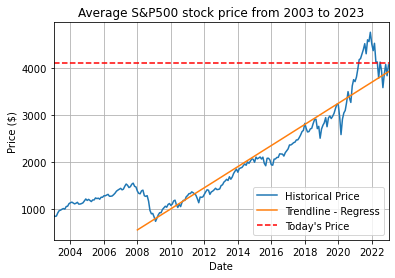

In [79]:
# Line plot and regression model for the average monthly price of the S&P500

sorted_data = clean_sp500_index_df.sort_values(by= "Date", ascending=True)
regress_start_date = sorted_data[sorted_data["Date"].dt.year >= 2008]
dates_in_numbers = np.arange(len(regress_start_date["Date"]))
fit = np.polyfit(dates_in_numbers, regress_start_date["Price"], deg=1)
fit_function = np.poly1d(fit)

print(f'Regression model: y = {round(fit[0],2)}x + {round(fit[1],2)}')

plt.plot(sorted_data['Date'], sorted_data['Price'], label = "Historical Price")
plt.plot(regress_start_date['Date'], fit_function(dates_in_numbers), label = "Trendline - Regress")
plt.axhline(last_close_price, color ='r', linestyle = '--', label = "Today's Price")

plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Average S&P500 stock price from 2003 to 2023")
plt.xlim(sorted_data["Date"].min(), sorted_data["Date"].max())
plt.legend()
plt.grid()
plt.show()

In [60]:
# Prediction model based on the regression model

years_for_preditction = 1

prediction = fit_function(sorted_data['Date'].size + (years_for_preditction * 12))
print(f' In {years_for_preditction} years, the S&P500 stock price is estimated to be around ${format(round(prediction,2), ",")}')

 In 1 years, the S&P500 stock price is estimated to be around $5,293.39


In [61]:
# Compare today's price vs predicted price

print(f'Todays S&P500 stock price is ${format(round(last_close_price,2), ",")} as at {last_close_date}')
print(f'Prediction of the S&P500 stock price in {years_for_preditction} years is estimated to be around ${format(round(prediction,2), ",")}')

Todays S&P500 stock price is $4,119.19 as at 2023-02-01 15:59:00
Prediction of the S&P500 stock price in 1 years is estimated to be around $5,293.39


#### 3. Historical index price data per sector of the S&P500

In [62]:
# Read and review historical index price data per sector for the S&P500

sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 
           'Health Care', 'Industrials', 'Information Technology', 'Materials',
           'Real Estate', 'Communication Services', 'Utilities']

sectors_dic_df = {}

list_of_csv = ["S&P 500 Consumer Discretionary Historical Data",
               "S&P 500 Consumer Staples Historical Data",
               "S&P 500 Energy Historical Data",
               "S&P 500 Financials Historical Data",
               "S&P 500 Health Care Historical Data",
               "S&P 500 Industrials Historical Data",
               "S&P 500 Information Technology Historical Data",
               "S&P 500 Materials Historical Data",
               "S&P 500 Real Estate Historical Data",
               "S&P 500 Telecom Services Historical Data",
               "S&P 500 Utilities Historical Data"]

for file_name in list_of_csv:
    sectors_dic_df[file_name] = pd.read_csv(f'Resources/S&P 500 Historical Data Sectors/{file_name}.csv')
    sectors_dic_df[file_name]["Sector"] = sectors[list_of_csv.index(file_name)]  

sectors_merged_df = pd.concat(sectors_dic_df, ignore_index=True)

In [63]:
# Adjust datatypes for all columns and delete unnecessary columns

sectors_merged_df["Date"] = pd.to_datetime(sectors_merged_df["Date"], dayfirst=True)

sectors_merged_df["Price"] = sectors_merged_df["Price"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["Open"] = sectors_merged_df["Open"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["High"] = sectors_merged_df["High"].replace({',': ''}, regex=True).astype(float)
sectors_merged_df["Low"] = sectors_merged_df["Low"].replace({',': ''}, regex=True).astype(float)

sectors_merged_df["Change %"] = sectors_merged_df["Change %"].str.rstrip('%').astype(float) / 100

del sectors_merged_df["Vol."]

sectors_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2651 non-null   datetime64[ns]
 1   Price     2651 non-null   float64       
 2   Open      2651 non-null   float64       
 3   High      2651 non-null   float64       
 4   Low       2651 non-null   float64       
 5   Change %  2651 non-null   float64       
 6   Sector    2651 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 145.1+ KB


In [64]:
# Cleaned data of the S&P500 price index per sector

clean_sectors_index_df = pd.DataFrame(sectors_merged_df)
clean_sectors_index_df

,Date,Price,Open,High,Low,Change %,Sector
0,2023-01-01,1150.81,1010.71,1159.39,987.46,0.1445,Consumer Discretionary
1,2022-12-01,1005.48,1139.78,1140.89,981.17,-0.1131,Consumer Discretionary
2,2022-11-01,1133.65,1144.33,1146.40,1023.30,0.0081,Consumer Discretionary
3,2022-10-01,1124.52,1121.29,1176.83,1051.35,0.0020,Consumer Discretionary
4,2022-09-01,1122.31,1212.60,1311.72,1119.27,-0.0809,Consumer Discretionary
...,...,...,...,...,...,...,...
2646,2003-05-01,111.50,101.42,112.85,99.47,0.0984,Utilities
2647,2003-04-01,101.51,93.65,102.35,93.26,0.0845,Utilities
2648,2003-03-01,93.60,89.53,95.06,87.66,0.0460,Utilities
2649,2003-02-01,89.48,94.60,95.45,84.62,-0.0531,Utilities


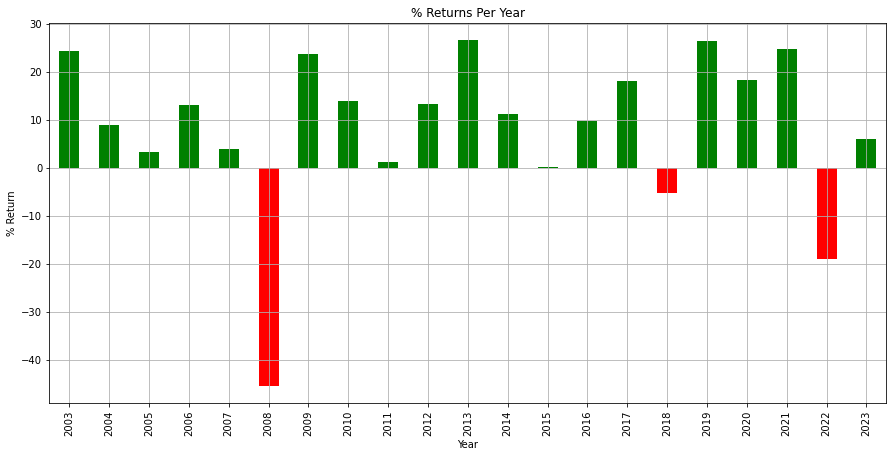

In [115]:
# Years of positive and negative return of the S&P500 from 2003 to 2023

data_change = pd.DataFrame(clean_sp500_index_df.groupby(clean_sp500_index_df["Date"].dt.year)["Change %"].sum() * 100)

data_change['Change %'].plot(kind='bar', figsize=(15,7), color=((data_change['Change %'] > 0).map({True: 'g', False: 'r'})))
plt.title('% Returns Per Year')
plt.xlabel("Year")
plt.ylabel("% Return")
plt.grid()

Text(0, 0.5, 'Price')

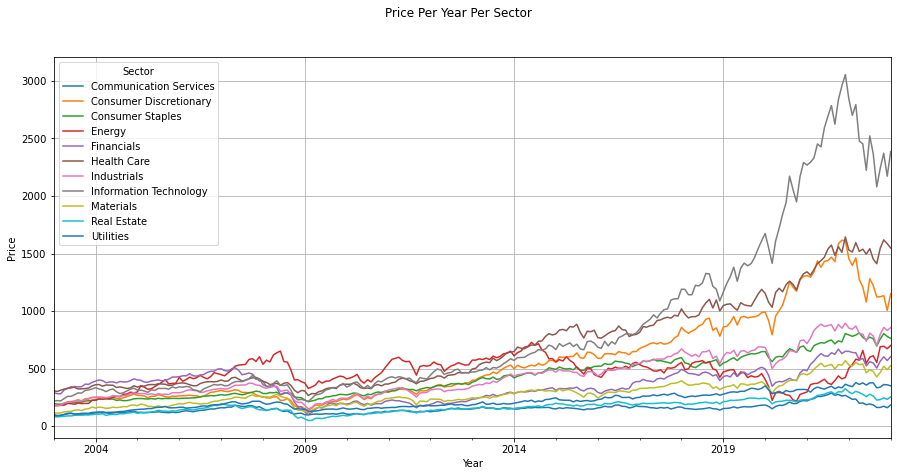

In [75]:
# Explode S&P500 in its sectors. Trend based on stock price per sector.

clean_sectors_index_df.pivot_table(values="Price", index=clean_sectors_index_df["Date"], columns='Sector').plot(figsize=(15,7))
plt.title('Price Per Year Per Sector')
plt.grid()
plt.xlabel("Year")
plt.ylabel("Price")

Accum. % of return is 53.22% from Jan 2018 to Jan 2013


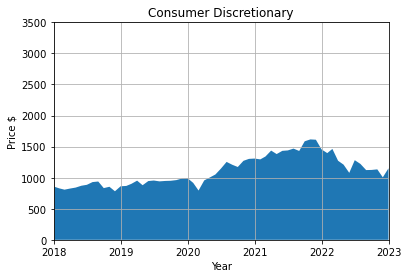

In [145]:
# Performance of the secotrs based on stock price for the last 5 years 2003 to 2023

start_date = '2018-01-01'
end_date = '2023-01-01'

# consumer_discretionary 

consumer_discretionary = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Consumer Discretionary"]
consumer_discretionary_filtered = consumer_discretionary[(consumer_discretionary['Date'] >= start_date) & (consumer_discretionary['Date'] <= end_date)]
consumer_discretionary_return = consumer_discretionary_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(consumer_discretionary_return)} from Jan 2018 to Jan 2013")

plt.fill_between(consumer_discretionary_filtered["Date"] , consumer_discretionary_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(consumer_discretionary_filtered["Date"].min(), consumer_discretionary_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Consumer Discretionary")
plt.show()


Accum. % of return is 31.52% from Jan 2018 to Jan 2013


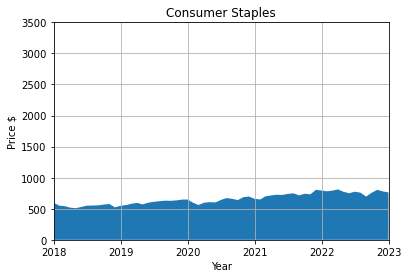

In [144]:
# consumer_staples

consumer_staples = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Consumer Staples"]
consumer_staples_filtered = consumer_staples[(consumer_staples['Date'] >= start_date) & (consumer_staples['Date'] <= end_date)]
consumer_staples_return = consumer_staples_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(consumer_staples_return)} from Jan 2018 to Jan 2013")

plt.fill_between(consumer_staples_filtered["Date"] , consumer_staples_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(consumer_staples_filtered["Date"].min(), consumer_staples_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Consumer Staples")
plt.show()

Accum. % of return is 63.36% from Jan 2018 to Jan 2013


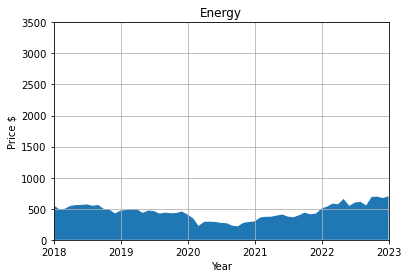

In [143]:
# energy

energy = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Energy"]
energy_filtered = energy[(energy['Date'] >= start_date) & (energy['Date'] <= end_date)]
energy_return = energy_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(energy_return)} from Jan 2018 to Jan 2013")

plt.fill_between(energy_filtered["Date"] , energy_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(energy_filtered["Date"].min(), energy_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Energy")
plt.show()

Accum. % of return is 39.58% from Jan 2018 to Jan 2013


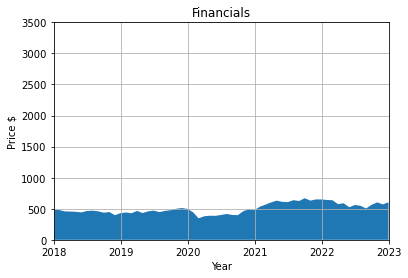

In [142]:
# financials

financials = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Financials"]
financials_filtered = financials[(financials['Date'] >= start_date) & (financials['Date'] <= end_date)]
financials_return = financials_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(financials_return)} from Jan 2018 to Jan 2013")

plt.fill_between(financials_filtered["Date"] , financials_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(financials_filtered["Date"].min(), financials_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Financials")
plt.show()

Accum. % of return is 54.71% from Jan 2018 to Jan 2013


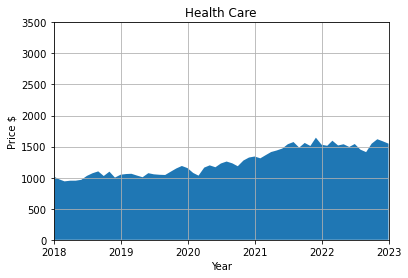

In [141]:
# health_care

health_care = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Health Care"]
health_care_filtered = health_care[(health_care['Date'] >= start_date) & (health_care['Date'] <= end_date)]
health_care_return = health_care_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(health_care_return)} from Jan 2018 to Jan 2013")

plt.fill_between(health_care_filtered["Date"] , health_care_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(health_care_filtered["Date"].min(), health_care_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Health Care")
plt.show()

Accum. % of return is 42.27% from Jan 2018 to Jan 2013


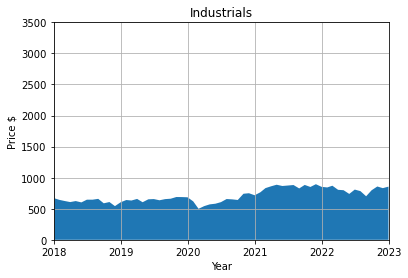

In [140]:
# industrials

industrials = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Industrials"]
industrials_filtered = industrials[(industrials['Date'] >= start_date) & (industrials['Date'] <= end_date)]
industrials_return = industrials_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(industrials_return)} from Jan 2018 to Jan 2013")

plt.fill_between(industrials_filtered["Date"] , industrials_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(industrials_filtered["Date"].min(), industrials_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Industrials")
plt.show()

Accum. % of return is 90.16% from Jan 2018 to Jan 2013


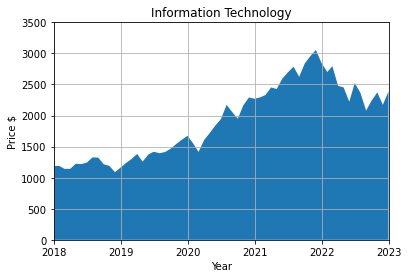

In [139]:
# information_technology

information_technology = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Information Technology"]
information_technology_filtered = information_technology[(information_technology['Date'] >= start_date) & (information_technology['Date'] <= end_date)]
information_technology_return = information_technology_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(information_technology_return)} from Jan 2018 to Jan 2013")

plt.fill_between(information_technology_filtered["Date"] , information_technology_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(information_technology_filtered["Date"].min(), information_technology_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Information Technology")
plt.show()

Accum. % of return is 44.83% from Jan 2018 to Jan 2013


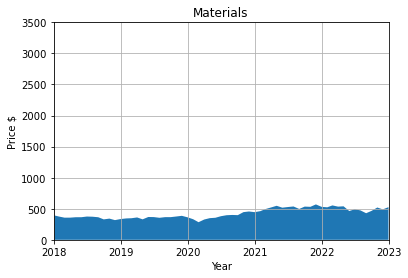

In [146]:
# materials

materials = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Materials"]
materials_filtered = materials[(materials['Date'] >= start_date) & (materials['Date'] <= end_date)]
materials_return = materials_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(materials_return)} from Jan 2018 to Jan 2013")

plt.fill_between(materials_filtered["Date"] , materials_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(materials_filtered["Date"].min(), materials_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Materials")
plt.show()

Accum. % of return is 31.27% from Jan 2018 to Jan 2013


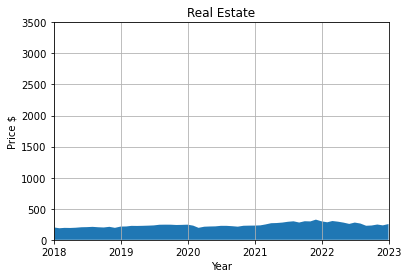

In [147]:
# real_estate

real_estate = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Real Estate"]
real_estate_filtered = real_estate[(real_estate['Date'] >= start_date) & (real_estate['Date'] <= end_date)]
real_estate_return = real_estate_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(real_estate_return)} from Jan 2018 to Jan 2013")

plt.fill_between(real_estate_filtered["Date"] , real_estate_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(real_estate_filtered["Date"].min(), real_estate_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Real Estate")
plt.show()

Accum. % of return is 20.96% from Jan 2018 to Jan 2013


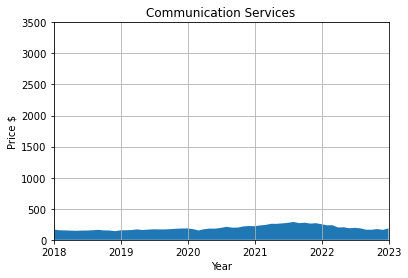

In [148]:
# communication_services

communication_services = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Communication Services"]
communication_services_filtered = communication_services[(communication_services['Date'] >= start_date) & (communication_services['Date'] <= end_date)]
communication_services_return = communication_services_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(communication_services_return)} from Jan 2018 to Jan 2013")

plt.fill_between(communication_services_filtered["Date"] , communication_services_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(communication_services_filtered["Date"].min(), communication_services_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Communication Services")
plt.show()

Accum. % of return is 33.70% from Jan 2018 to Jan 2013


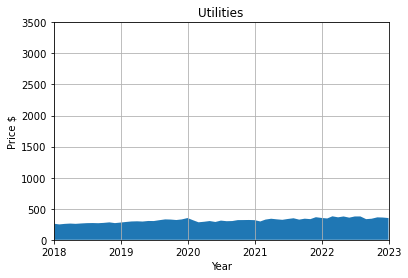

In [149]:
# utilities

utilities = clean_sectors_index_df.loc[clean_sectors_index_df["Sector"] == "Utilities"]
utilities_filtered = utilities[(utilities['Date'] >= start_date) & (utilities['Date'] <= end_date)]
utilities_return = utilities_filtered["Change %"].sum() * 100

print(f"Accum. % of return is {'{0:.2f}%'.format(utilities_return)} from Jan 2018 to Jan 2013")

plt.fill_between(utilities_filtered["Date"] , utilities_filtered["Price"])
plt.grid ()
plt.xlabel ("Year")
plt.ylabel ("Price $")
plt.xlim(utilities_filtered["Date"].min(), utilities_filtered["Date"].max())
plt.ylim(0, 3500)
plt.title("Utilities")
plt.show()

#### 2.5. Today's Data - Sector breakdown based on market capitalisation of the S&P500

##### API Link: https://site.financialmodelingprep.com/developer/docs/stock-api/#Python

In [67]:
# Import API Key and set all parameters for the URL

from password import stock_quote_key

symbols_list = clean_sp500_info_df["Symbol"].unique()
join_symbols_list = ",".join(symbols_list)

url = f"https://financialmodelingprep.com/api/v3/quote/{join_symbols_list}?apikey={stock_quote_key}"
url

'https://financialmodelingprep.com/api/v3/quote/A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BALL,BAX,BBWI,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BMY,BR,BRK.B,BRO,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDAY,CDNS,CDW,CE,CEG,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COO,COP,COST,CPB,CPRT,CPT,CRL,CRM,CSCO,CSGP,CSX,CTAS,CTLT,CTRA,CTSH,CTVA,CVS,CVX,CZR,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISH,DLR,DLTR,DOV,DOW,DPZ,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,ELV,EMN,EMR,ENPH,EOG,EPAM,EQIX,EQR,EQT,ES,ESS,ETN,ETR,ETSY,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FCX,FDS,FDX,FE,FFIV,FIS,FISV,FITB,FLT,FMC,FOX,FOXA,FRC,FRT,FSLR,FTNT,FTV,GD,GE,GEHC,GEN,GILD,GIS,GL,GLW,GM,GNRC,GOOG,GOOGL,GPC,GPN,GRMN,GS,GWW,HAL,HAS,HBAN,HCA,HD,HES,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRL,HSIC

In [68]:
# Make calls/requests to Financial Modeling Prep API to get most updated data of each stock and store response

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        "avgVolume": 1303926,
        "change": 3.37,
        "changesPercentage": 2.2159,
        "dayHigh": 156.29,
        "dayLow": 151.72,
        "earningsAnnouncement": "2023-02-20T10:59:00.000+0000",
        "eps": 4.18,
        "exchange": "NYSE",
        "marketCap": 46024392400,
        "name": "Agilent Technologies, Inc.",
        "open": 153.31,
        "pe": 37.19,
        "previousClose": 152.08,
        "price": 155.45,
        "priceAvg200": 133.5171,
        "priceAvg50": 152.5366,
        "sharesOutstanding": 296072000,
        "symbol": "A",
        "timestamp": 1675285384,
        "volume": 1493619,
        "yearHigh": 160.26,
        "yearLow": 112.52
    },
    {
        "avgVolume": 28020360,
        "change": 0.55,
        "changesPercentage": 3.4077,
        "dayHigh": 16.715,
        "dayLow": 15.92,
        "earningsAnnouncement": "2023-01-26T13:30:00.000+0000",
        "eps": -3.671,
        "exchange": "NASDAQ",
        "marketCap": 10846847556,
  

In [69]:
# Dataframe created with the json response

sp500_index_today = pd.DataFrame.from_records(response)
sp500_index_today.head()

,symbol,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,...,exchange,volume,avgVolume,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
0,A,"Agilent Technologies, Inc.",155.45,2.2159,3.37,151.7200,156.290,160.26,112.52,46024392400,...,NYSE,1493619,1303926,153.31,152.08,4.180,37.19,2023-02-20T10:59:00.000+0000,296072000,1675285384
1,AAL,American Airlines Group Inc.,16.69,3.4077,0.55,15.9200,16.715,21.42,11.65,10846847556,...,NASDAQ,26851055,28020360,16.04,16.14,-3.671,-4.55,2023-01-26T13:30:00.000+0000,649900992,1675285204
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,4.56,150.1700,157.730,237.39,138.52,9293350308,...,NYSE,889499,1077205,151.94,152.28,7.800,20.11,2023-02-13T10:59:00.000+0000,59253700,1675285201
3,AAPL,Apple Inc.,145.43,0.7901,1.14,141.3200,146.610,179.61,124.17,2303058556692,...,NASDAQ,77013573,78291163,143.97,144.29,6.110,23.80,2023-02-02T21:00:00.000+0000,15836199936,1675285204
4,ABBV,AbbVie Inc.,146.60,-0.7783,-1.15,145.2652,147.440,175.91,133.05,259259168000,...,NYSE,5295645,5402345,146.63,147.75,7.500,19.55,2023-02-09T14:00:00.000+0000,1768480000,1675285388


In [70]:
# Clean today's data dataframe, then create a new cleaned dataframe

renamed_today_data = sp500_index_today.rename(columns={"symbol": "Symbol", "name": "Description", "price": "Price", 
                                                       "changesPercentage": "Change %", "marketCap": "Market Cap"})

clean_sp500_index_today = pd.DataFrame(renamed_today_data[["Symbol", "Description", "Price", "Change %", "Market Cap"]])
clean_sp500_index_today

,Symbol,Description,Price,Change %,Market Cap
0,A,"Agilent Technologies, Inc.",155.45,2.2159,46024392400
1,AAL,American Airlines Group Inc.,16.69,3.4077,10846847556
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,9293350308
3,AAPL,Apple Inc.,145.43,0.7901,2303058556692
4,ABBV,AbbVie Inc.,146.60,-0.7783,259259168000
...,...,...,...,...,...
496,YUM,"Yum! Brands, Inc.",129.01,-1.1493,36340568880
497,ZBH,"Zimmer Biomet Holdings, Inc.",127.80,0.3612,26819085600
498,ZBRA,Zebra Technologies Corporation,328.63,3.9376,16967101174
499,ZION,"Zions Bancorporation, National Association",53.39,0.4327,7937170960


In [71]:
# Today's data including the sector of S&P500

sp500_index_sector_today = pd.merge(clean_sp500_index_today, clean_sp500_info_df[['Symbol', 'Sector', 'Sub-sector']], 
                                    on='Symbol', how='left')

print(sp500_index_sector_today.info())
sp500_index_sector_today

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       501 non-null    object 
 1   Description  501 non-null    object 
 2   Price        501 non-null    float64
 3   Change %     501 non-null    float64
 4   Market Cap   501 non-null    int64  
 5   Sector       501 non-null    object 
 6   Sub-sector   501 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 31.3+ KB
None


,Symbol,Description,Price,Change %,Market Cap,Sector,Sub-sector
0,A,"Agilent Technologies, Inc.",155.45,2.2159,46024392400,Health Care,Health Care Equipment
1,AAL,American Airlines Group Inc.,16.69,3.4077,10846847556,Industrials,Airlines
2,AAP,"Advance Auto Parts, Inc.",156.84,2.9945,9293350308,Consumer Discretionary,Automotive Retail
3,AAPL,Apple Inc.,145.43,0.7901,2303058556692,Information Technology,"Technology Hardware, Storage & Peripherals"
4,ABBV,AbbVie Inc.,146.60,-0.7783,259259168000,Health Care,Pharmaceuticals
...,...,...,...,...,...,...,...
496,YUM,"Yum! Brands, Inc.",129.01,-1.1493,36340568880,Consumer Discretionary,Restaurants
497,ZBH,"Zimmer Biomet Holdings, Inc.",127.80,0.3612,26819085600,Health Care,Health Care Equipment
498,ZBRA,Zebra Technologies Corporation,328.63,3.9376,16967101174,Information Technology,Electronic Equipment & Instruments
499,ZION,"Zions Bancorporation, National Association",53.39,0.4327,7937170960,Financials,Regional Banks
